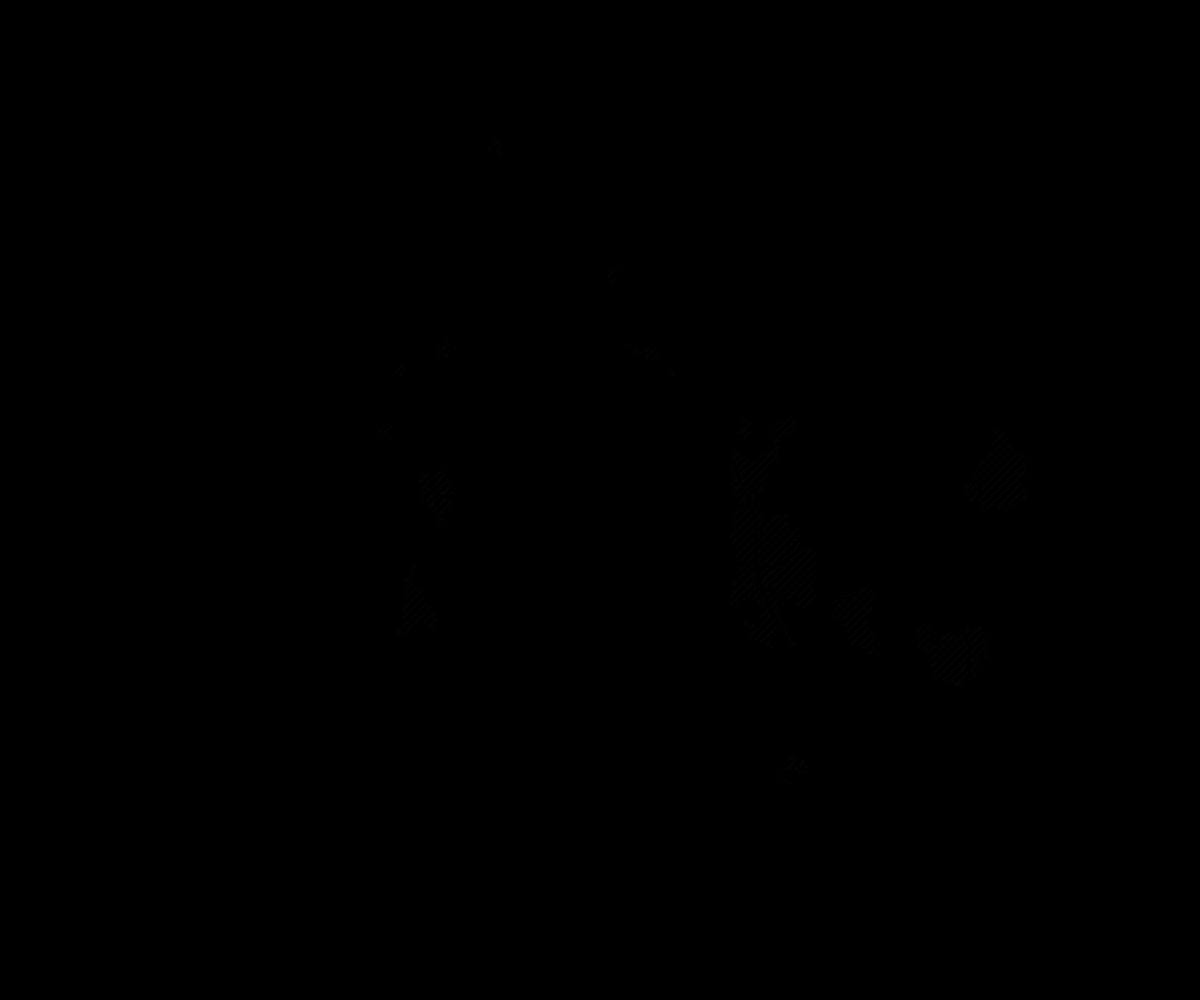

In [55]:
# Import some env variables
import os
tmpenv = !cat .env
ENV = {key:value.strip().replace('"','') for (key,value) in [var.split('=') for var in tmpenv]}

from owslib.wms import WebMapService
from IPython.core.display import Image, display

# Specify the layer you want to view
# layer = 'ch.swisstopo.vec200-transportation-railway'
# layer = 'ch.swisstopo.pixelkarte-farbe'
layer = 'ch.bakom.notruf-144_festnetz_sondergebiet'

# Define the wms service
swisstopo_wms = WebMapService(
    'http://wms.swisstopo.admin.ch/',
    version='1.3.0',
    username=ENV['CHTOPOWMSUSER'],
    password=ENV['CHTOPOWMSPASS']
)

bgdi_wms = WebMapService(
    'http://wms.geo.admin.ch/',
    version='1.3.0'
)

try:
    attrs = ['title', 'boundingBox', 'boundingBoxWGS84', 'styles']

    for attr in attrs:
        print('{}: {}'.format(attr.ljust(20), getattr(swisstopo_wms[layer], attr)))
except:
    # in case it's not in getcap
    pass

# style is usually usually always 'default'
bbox = (2450000.0, 1050000.0, 2850000.0, 1300000.0)
img = bgdi_wms.getmap(layers=[layer],
                 styles=['default'],
                 srs='EPSG:2056',
                 bbox=bbox,
                 size=(1200, 1000),
                 format='image/jpeg',
                 transparent=True
)

display(Image(data=img.read(), format='jpg', unconfined=True))
